# Monte carlo simulation

In [1]:
import numpy as np 
import polars as pl 
from polars import col 
import matplotlib.pyplot as plt 
import seaborn as sb 

%load_ext autoreload
%autoreload 2
plt.style.use("../matplotlibrc")

In [2]:
from findec.returns import draw_lognormal_return
from findec.utility import composite_crra_utility

In [3]:
from findec.dataclasses import Preferences
preferences = Preferences()

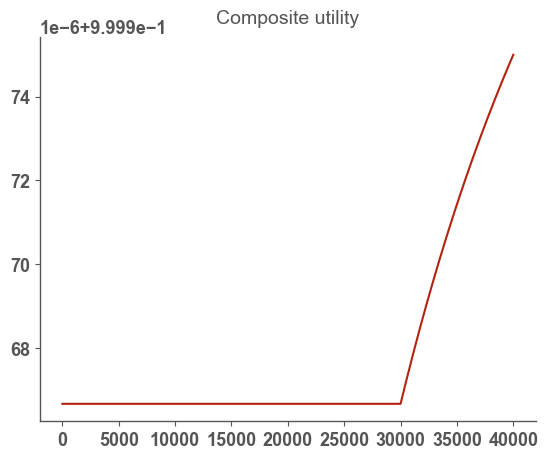

In [4]:
w = np.linspace(0, 40e3, 1000)
u = np.array([composite_crra_utility(wi, pref=preferences) for wi in w])
fig, ax = plt.subplots()
ax.plot(w, u)
ax.set_title("Composite utility");

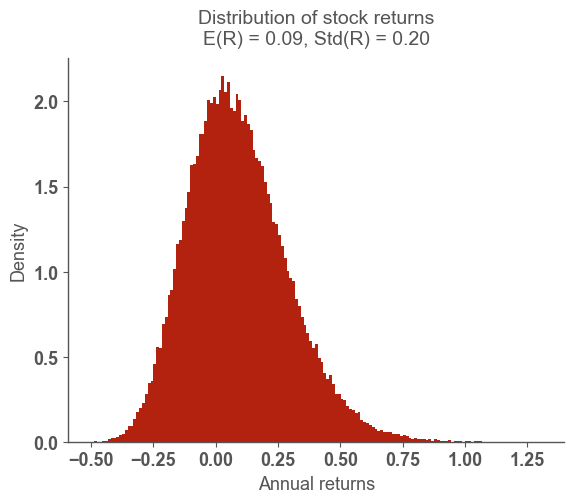

In [5]:
stock_returns = draw_lognormal_return(mean_return=0.09, stdev=0.2, n_sims=100_000)
fig, ax = plt.subplots()
ax.hist(stock_returns, bins="auto", density=True)
stock_returns_mean = stock_returns.mean()
stock_returns_std = stock_returns.std()
ax.set_xlabel("Annual returns")
ax.set_ylabel("Density")
ax.set_title(
    f"Distribution of stock returns\nE(R) = {stock_returns_mean:.2f}, Std(R) = {stock_returns_std:.2f}"
);

In [6]:
from findec.simulate import simulate_life_path
from findec.dataclasses import Assets

In [7]:
expected_return_risky = 0.09
std_dev_return_risky = 0.20
risk_free_rate = 0.04
tax_rate = 0.2

initial_assets = Assets(tax_free=400_000.0, taxable=600_000.0, tax_rate=tax_rate)

states = simulate_life_path(
    expected_return_risky=0.09,
    std_dev_return_risky=0.20,
    risk_free_rate=0.04,
    pref=preferences,
    a=initial_assets,
    social_security=30_000.0,
    time_horizon=20,    
    starting_age=65,
    is_male=False,
    rng_seed=45,
    with_survival_probabilities=False,
)

In [9]:
df = pl.DataFrame([s.as_dict() for s in states.values()])
df

age,alive,tax_free,taxable,risky_return,consumption,consumption_fraction,total_utility
i64,bool,f64,f64,f64,f64,f64,f64
65,true,400000.0,600000.0,null,null,null,0.0
66,true,425314.96882,590838.574976,0.07726,59462.756185,0.072164,0.980376
67,true,464685.915055,592892.224045,0.12411,62543.756726,0.074731,1.941529
68,true,470993.870953,545811.263521,-0.002281,67512.748346,0.077595,2.883837
69,true,487766.203041,508711.349137,0.032977,67673.97313,0.08081,3.807669
…,…,…,…,…,…,…,…
81,true,350211.399032,0.0,-0.020255,94420.296647,0.223249,13.577508
82,true,261573.919014,0.0,-0.107665,98204.997771,0.274071,14.291663
83,true,198746.768301,0.0,0.077038,98632.311229,0.358853,14.991815
